In [ ]:
import os

In [ ]:
!pip install findspark
!pip install pyspark
import findspark
from pyspark.sql import SparkSession

In [ ]:
!pip install pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import csv
from pyspark.sql.types import *
from pyspark.sql.functions import format_number, when
import pyspark.sql.functions as F

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
crime_data = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29.0,25.0,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8.0,44.0,06,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35.0,21.0,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28.0,25.0,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
primaryVisualizeDF = crime_data.groupby('Primary Type').size()

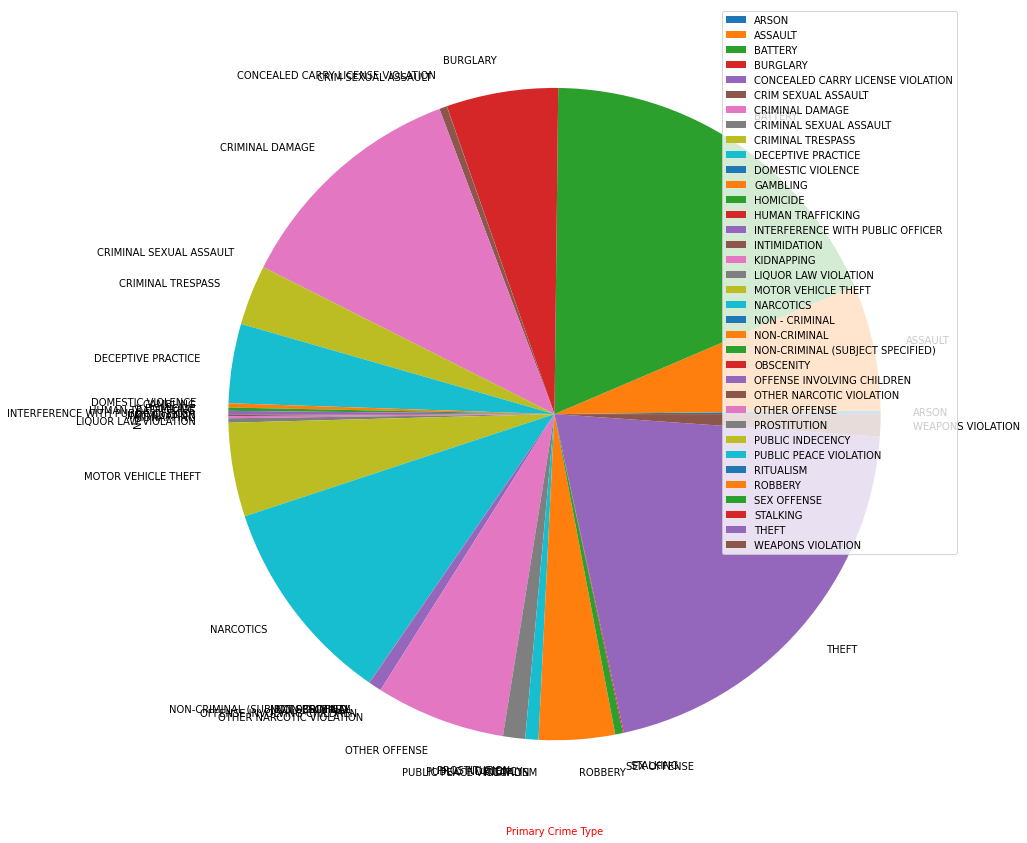

In [ ]:
primaryVisualizeDF.plot.pie(figsize = (15,15))
plt.xlabel('Primary Crime Type', fontsize=10, color = 'red')
plt.legend()

In [ ]:
data = crime_data.replace(to_replace='None', value=np.nan).dropna()

In [ ]:
# create an instance of label encoder for categorical variables
labelEncoder = LabelEncoder()

In [ ]:
primaryEncoded = labelEncoder.fit_transform(data['Primary Type'])
primaryEncoded

array([ 2, 33, 18, ..., 33,  3,  2])

In [ ]:
data['Primary Type'] = primaryEncoded

In [ ]:
# create an instance of label encoder for categorical variables
labelEncoder2 = LabelEncoder()

In [ ]:
locDiscEncoded = labelEncoder2.fit_transform(data['Location Description'])
locDiscEncoded

array([155,  67, 178, ..., 155,  50, 178])

In [ ]:
data['Location Description'] = locDiscEncoded

In [ ]:
# create an instance of label encoder for categorical variables
labelEncoder3 = LabelEncoder()

In [ ]:
blockEncoded = labelEncoder2.fit_transform(data['Location Description'])
blockEncoded

array([155,  67, 178, ..., 155,  50, 178])

In [ ]:
data['Block'] = locDiscEncoded

In [ ]:
from sklearn.decomposition import PCA #use PCA to combine features

In [ ]:
location = data[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)

In [ ]:
loc = pca.fit_transform(location)

In [ ]:
data['Location'] = loc

In [ ]:
data.head(5)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,155,0486,2,DOMESTIC BATTERY SIMPLE,155,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.670000,0.024646
1,10224739,HY411615,09/04/2015 11:30:00 AM,67,0870,33,POCKET-PICKING,67,False,False,1511.0,15.0,29.0,25.0,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895080,-87.765400,-0.089520
3,10224740,HY411595,09/05/2015 12:45:00 PM,178,2023,18,POSS: HEROIN(BRN/TAN),178,True,False,1412.0,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937406,-87.716650,-0.105600
4,10224741,HY411610,09/05/2015 01:00:00 PM,17,0560,1,SIMPLE,17,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881903,-87.755121,-0.073138
5,10224742,HY411435,09/05/2015 10:55:00 AM,155,0610,3,FORCIBLE ENTRY,155,False,False,614.0,6.0,21.0,71.0,05,1168430.0,1850165.0,2015.0,02/10/2018 03:50:01 PM,41.744379,-87.658431,0.093098


In [ ]:
#taking a fraction of data
data_sample = data.sample(frac=0.1, random_state=123)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [ ]:
corelation = data.corr()
corelation

,ID,Block,Primary Type,Location Description,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
ID,1.000000,-0.046185,0.011921,-0.046185,-0.034640,-0.005252,0.022068,-0.011184,0.004910,0.004812,0.988060,0.004779,0.005042,-0.002521
Block,-0.046185,1.000000,0.105635,1.000000,0.018971,0.025729,0.003972,0.019284,-0.029291,-0.036802,-0.047954,-0.036583,-0.030100,0.021692
Primary Type,0.011921,0.105635,1.000000,0.105635,0.042478,0.037542,0.062544,-0.077026,-0.005956,0.082120,0.009154,0.081956,-0.004707,-0.068900
Location Description,-0.046185,1.000000,0.105635,1.000000,0.018971,0.025729,0.003972,0.019284,-0.029291,-0.036802,-0.047954,-0.036583,-0.030100,0.021692
Beat,-0.034640,0.018971,0.042478,0.018971,1.000000,0.936933,0.631168,-0.502751,-0.495750,0.629685,-0.036903,0.630190,-0.490946,-0.657795
District,-0.005252,0.025729,0.037542,0.025729,0.936933,1.000000,0.686612,-0.495291,-0.554849,0.638264,-0.006592,0.638985,-0.550505,-0.681810
Ward,0.022068,0.003972,0.062544,0.003972,0.631168,0.686612,1.000000,-0.526934,-0.456480,0.642958,0.021477,0.643268,-0.451108,-0.657366
Community Area,-0.011184,0.019284,-0.077026,0.019284,-0.502751,-0.495291,-0.526934,1.000000,0.262175,-0.771440,-0.011684,-0.770682,0.253049,0.706680
X Coordinate,0.004910,-0.029291,-0.005956,-0.029291,-0.495750,-0.554849,-0.456480,0.262175,1.000000,-0.525243,0.006193,-0.527657,0.999887,0.716496
Y Coordinate,0.004812,-0.036802,0.082120,-0.036802,0.629685,0.638264,0.642958,-0.771440,-0.525243,1.000000,0.004710,0.999994,-0.516617,-0.969939


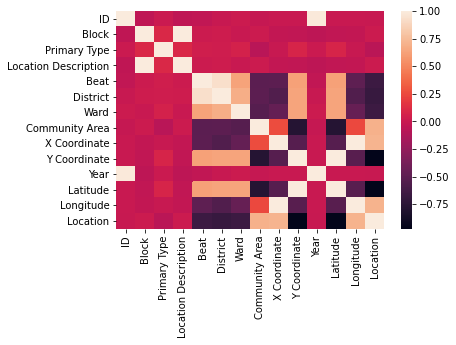

In [ ]:
sns.heatmap(corelation)

In [ ]:
selected_columns = ['Latitude','Longitude','Location Description','Block']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_gs, X_test, y_train_gs, y_test = train_test_split(data[selected_columns], data['Primary Type'], test_size=0.3) # 70% training and 30% test

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5) 
knn_5.fit(X_train_gs,y_train_gs)
pred_train = knn_5.predict(X_train_gs)
pred_i = knn_5.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train_gs, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

In [ ]:
error_rate = []

krange = range(10,50,5)
for i in krange:
 
 knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights = 'uniform',n_jobs= -1) # haversine - if only lat long
 knn.fit(X_train_gs,y_train_gs)
 pred_train = knn.predict(X_train_gs)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
 print('Neighbours ',i)
 print('Test accuracy ', metrics.accuracy_score(y_train_gs, pred_train))
 print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
 print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Neighbours  10
Test accuracy  0.4261851266025163
Accuracy  0.31575544148661017
F1 score  0.2941260468004382
Neighbours  15
Test accuracy  0.4051877400843306
Accuracy  0.3252755560861088
F1 score  0.297131903407923
Neighbours  20
Test accuracy  0.39243156131023693
Accuracy  0.33049818948708765
F1 score  0.2971781143829702
Neighbours  25
Test accuracy  0.3841178752776558
Accuracy  0.33255739922804506
F1 score  0.29602391227453484
Neighbours  30
Test accuracy  0.37880137964553856
Accuracy  0.33507421113365965
F1 score  0.295881072175941
Neighbours  35
Test accuracy  0.3749856109280205
Accuracy  0.33674545382197285
F1 score  0.2947977035384238
Neighbours  40
Test accuracy  0.3711868959254412
Accuracy  0.33880466356293026
F1 score  0.29511758128931637
Neighbours  45
Test accuracy  0.3685819409685657
Accuracy  0.3402570530420596
F1 score  0.2946423316743119


Text(0, 0.5, 'Error Rate')

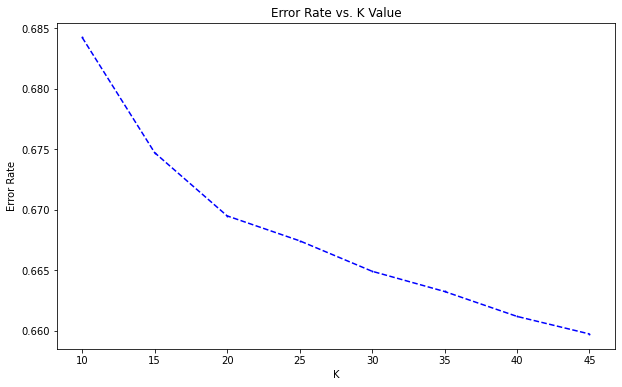

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(krange,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
grid_params = {
    'weights' : ['uniform', 'distance'],
    'metric' : ['manhattan','jaccard'] #haversine - if only lat long
}

In [ ]:
randomSearch = RandomizedSearchCV(
    KNeighborsClassifier(25),
    grid_params,
    verbose = 1,
    cv =3,
    random_state = 123
    )

NameError: ignored

In [ ]:
rs_results = randomSearch.fit(X_train_gs, y_train_gs)

NameError: ignored

In [ ]:
rs_results.best_score_

0.3232292128309401

In [ ]:
rs_results.best_params_

{'metric': 'manhattan', 'weights': 'uniform'}

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Oversample 'Majority'
sm = SMOTE('minority', random_state=123)

In [ ]:
X_train_res, y_train_res = SMOTE(k_neighbors=1).fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_train_res, columns= selected_columns)
y_train_updated = pd.Series(y_train_res)

In [ ]:
target_counts = y_train_updated.value_counts()
target_counts

33    20573
15    20573
1     20573
2     20573
3     20573
4     20573
5     20573
6     20573
7     20573
8     20573
9     20573
10    20573
11    20573
12    20573
13    20573
14    20573
16    20573
32    20573
17    20573
18    20573
19    20573
20    20573
22    20573
23    20573
24    20573
25    20573
26    20573
27    20573
28    20573
29    20573
30    20573
31    20573
0     20573
dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [ ]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
pred_i = knn.predict(X_test)

In [ ]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.03564631448999537
F1 score  0.0396860010014847


In [ ]:
from imblearn.under_sampling import ClusterCentroids

In [ ]:
# Undersample 'Majority'
cc = ClusterCentroids(sampling_strategy = 'majority')

In [ ]:
X_cc, y_cc = cc.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_cc, columns= selected_columns)
y_train_updated = pd.Series(y_cc)

In [ ]:
target_counts = y_train_updated.value_counts()
target_counts

2     16728
6     10437
18     6497
25     5971
1      5659
9      5361
3      5136
29     3852
17     3623
8      2041
33     1105
28      753
23      712
5       522
13      422
26      365
30      351
0       165
10      102
16       87
15       79
31       51
14       45
11       20
22       19
4        10
7         9
12        8
20        7
19        5
27        5
32        2
24        2
dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [ ]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
pred_i = knn.predict(X_test)

In [ ]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.15475027004783704
F1 score  0.07797144572431025


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy= 'minority')

In [ ]:
# fit and apply the transform
X_random, y_random = over.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_random, columns= selected_columns)
y_train_updated = pd.Series(y_random)

In [ ]:
target_counts_random = y_train_updated.value_counts()
target_counts_random

24    20573
32    20573
2     16728
6     10437
18     6497
25     5971
1      5659
9      5361
3      5136
29     3852
17     3623
8      2041
33     1105
28      753
23      712
5       522
13      422
26      365
30      351
0       165
10      102
16       87
15       79
31       51
14       45
11       20
22       19
4        10
7         9
12        8
20        7
19        5
27        5
dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [ ]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
pred_i = knn.predict(X_test)

In [ ]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.19371431510724757
F1 score  0.13350749232971157


In [ ]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy= 'majority')

In [ ]:
# fit and apply the transform
X_train_updated, y_train_updated = under.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train_updated = pd.Series(y_train_updated)
target_counts_random = y_train.value_counts()
target_counts_random

32    20573
2     16728
6     10437
18     6497
25     5971
1      5659
9      5361
3      5136
29     3852
17     3623
8      2041
33     1105
28      753
23      712
5       522
13      422
26      365
30      351
0       165
10      102
16       87
15       79
31       51
14       45
11       20
22       19
4        10
7         9
12        8
20        7
19        5
27        5
24        2
Name: Primary Type, dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [ ]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
pred_i = knn.predict(X_test)

In [ ]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.15482742657270718
F1 score  0.07805677049616844


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
#KNN with - 25 neighbours
knn = KNeighborsClassifier(25, metric='manhattan', weights = 'uniform',n_jobs= -1)

#random forest with 75 Decision Trees
rf = RandomForestClassifier(10, max_depth = 10, n_jobs= -1)

#Support Vector Classifier
svm = SVC(kernel = 'linear', random_state = 123, probability=True)

In [ ]:
# can using previopusly trained KNN as well
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.22748315415873668

In [ ]:
svm.fit(X_train, y_train)

NameError: ignored

In [ ]:
svm.score(X_test, y_test)

In [ ]:
#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf), ('svm', svm)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)